In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

## Data Loading

In [4]:
from zipfile import ZipFile

zf = ZipFile('/content/drive/MyDrive/Colab Notebooks/data/myData.zip', 'r')
zf.extractall()
zf.close()

In [5]:
# Parameters

path = "myData"  # folder with all the class folders
labelFile = '/content/drive/MyDrive/Colab Notebooks/data/labels.csv'  # file with all names of classes
batch_size_val = 5  # how many to process together
steps_per_epoch_val = 2000
epochs_val = 5
imageDimesions = (32, 32, 3)
testRatio = 0.2  # if 1000 images split will 200 for testing
validationRatio = 0.2  # if 1000 images 20% of remaining 800 will be 160 for validation

In [6]:
# Importing of the Images

count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [7]:
len(images),   classNo

(34799, array([ 0,  0,  0, ..., 42, 42, 42]))

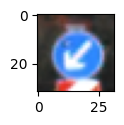

In [8]:
plt.figure(figsize=(1,1))
plt.imshow(images[34065])

## Data Preprocessing

In [9]:
############################### Split Data

X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID

In [10]:
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET

print("Data Shapes")
print("Train", end="");
print(X_train.shape, y_train.shape)
print("Validation", end="");
print(X_validation.shape, y_validation.shape)
print("Test", end="");
print(X_test.shape, y_test.shape)
assert (X_train.shape[0] == y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert (X_validation.shape[0] == y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert (X_test.shape[0] == y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert (X_train.shape[1:] == (imageDimesions)), " The dimesions of the Training images are wrong "
assert (X_validation.shape[1:] == (imageDimesions)), " The dimesionas of the Validation images are wrong "
assert (X_test.shape[1:] == (imageDimesions)), " The dimesionas of the Test images are wrong"


Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [11]:
############################### READ CSV FILE

data = pd.read_csv(labelFile)
print("data shape ", data.shape, type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [12]:
data

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


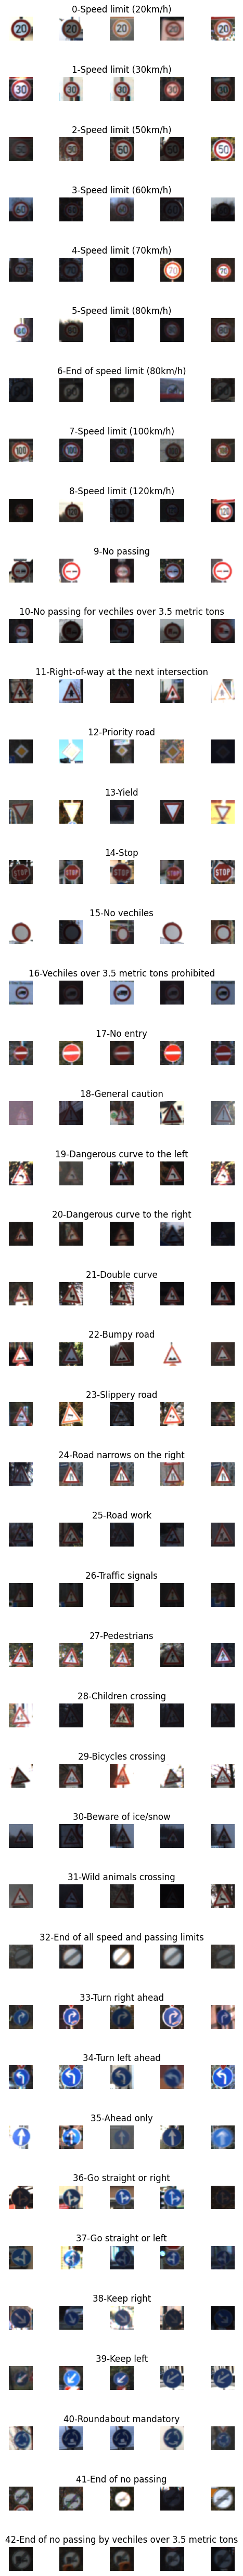

In [13]:
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES

num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            num_of_samples.append(len(x_selected))


[121, 1282, 1296, 806, 1102, 1057, 226, 825, 762, 868, 1130, 746, 1201, 1240, 440, 334, 230, 635, 688, 105, 189, 176, 214, 305, 150, 870, 334, 129, 325, 164, 259, 442, 134, 384, 239, 708, 226, 109, 1181, 163, 197, 138, 141]


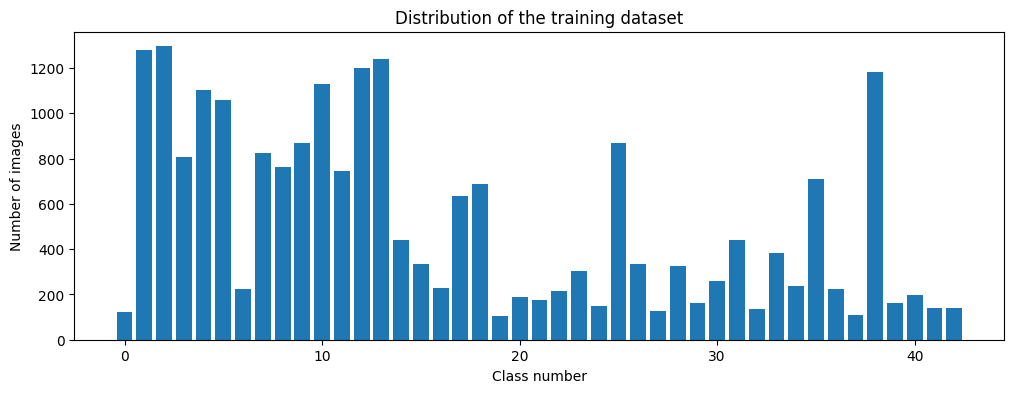

In [14]:
########################## DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

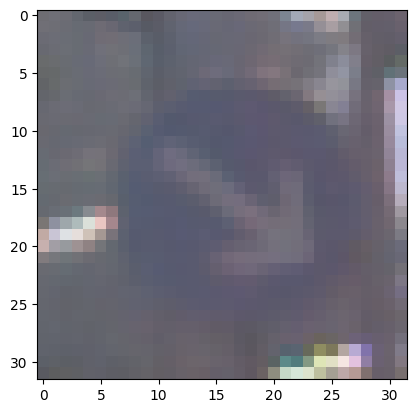

In [17]:
plt.imshow(X_train[0])

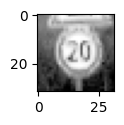

In [35]:
plt.figure(figsize=(1,1))
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY), 'gray')
plt.imshow(equalize(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)), 'gray')

In [19]:
############################### PREPROCESSING THE IMAGES

def grayscale(img):
    # img = np.array(img, dtype=np.uint8)
    # img = np.full(imageDimesions, 12, dtype = np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)  # CONVERT TO GRAYSCALE
    img = equalize(img)  # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img / 255  # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img


X_train = np.array(list(map(preprocessing, X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))
# cv2.imshow("GrayScale Images", X_train[random.randint(0, len(X_train) - 1)])  # TO CHECK IF THE TRAINING IS DONE PROPERLY

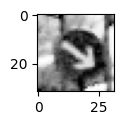

In [23]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], 'gray')

In [24]:
############################### ADD A DEPTH OF 1

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [25]:
X_train.shape

(22271, 32, 32, 1)

In [36]:
############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC

dataGen = ImageDataGenerator(width_shift_range=0.1,
                             # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                             height_shift_range=0.1,
                             zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                             shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                             rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train, batch_size=100)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch, y_batch = next(batches)

In [38]:
(batches[100][0].shape), (X_batch.shape)

((100, 32, 32, 1), (100, 32, 32, 1))

In [39]:
imageDimesions

(32, 32, 3)

In [ ]:
to_categorical(y_train, noOfClasses)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

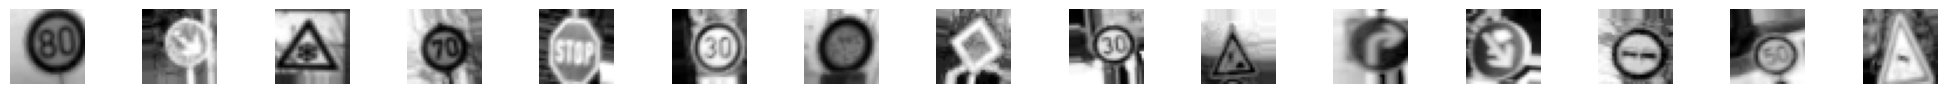

In [40]:
# TO SHOW AGMENTED IMAGE SAMPLES

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]), 'gray')
    axs[i].axis('off')
plt.show()

y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

## Model

In [42]:

############################### CONVOLUTION NEURAL NETWORK MODEL
def myModel():
    no_Of_Filters = 60
    batch_size_val = 100
    size_of_Filter = (5, 5)  # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
    # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    no_Of_Nodes = 500  # NO. OF NODES IN HIDDEN LAYERS
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1), activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))  # DOES NOT EFFECT THE DEPTH/NO OF FILTERS

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='sigmoid'))

    model.add(Dropout(0.5))  # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(noOfClasses, activation='softmax'))  # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


############################### TRAIN
model = myModel()
print(model.summary())
history = model.fit_generator(dataGen.flow(X_train, y_train, batch_size=batch_size_val),
                              steps_per_epoch=steps_per_epoch_val,
                              epochs=20,
                              validation_data=(X_validation, y_validation),
                              shuffle=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

<ipython-input-42-b636cbf18c38>:34: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(dataGen.flow(X_train, y_train, batch_size=batch_size_val),


2000/2000 [==============================] - 175s 87ms/step - loss: 3.5052 - accuracy: 0.0806 - val_loss: 2.4658 - val_accuracy: 0.3558
Epoch 2/20
2000/2000 [==============================] - 165s 82ms/step - loss: 2.3093 - accuracy: 0.3490 - val_loss: 1.0559 - val_accuracy: 0.6532
Epoch 3/20
2000/2000 [==============================] - 165s 83ms/step - loss: 1.5852 - accuracy: 0.5163 - val_loss: 0.6008 - val_accuracy: 0.8391
Epoch 4/20
2000/2000 [==============================] - 164s 82ms/step - loss: 1.2611 - accuracy: 0.6038 - val_loss: 0.5061 - val_accuracy: 0.8358
Epoch 5/20
2000/2000 [==============================] - 164s 82ms/step - loss: 1.0586 - accuracy: 0.6715 - val_loss: 0.4125 - val_accuracy: 0.8723
Epoch 6/20
2000/2000 [==============================] - 157s 79ms/step - loss: 0.9298 - accuracy: 0.7102 - val_loss: 0.2580 - val_accuracy: 0.9321
Epoch 7/20
2000/2000 [==============================] - 160s 80ms/step - loss: 0.8342 - accuracy: 0.7379 - val_loss: 0.2193 - val

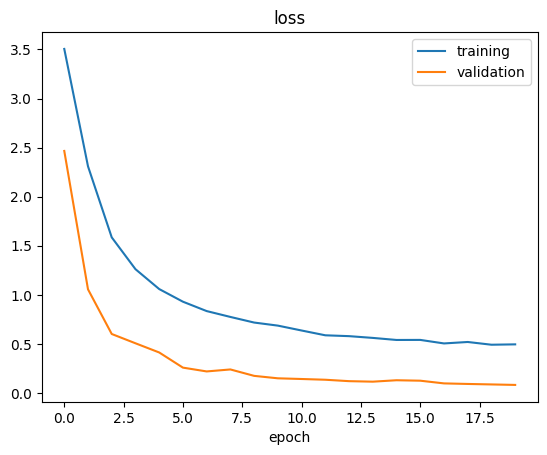

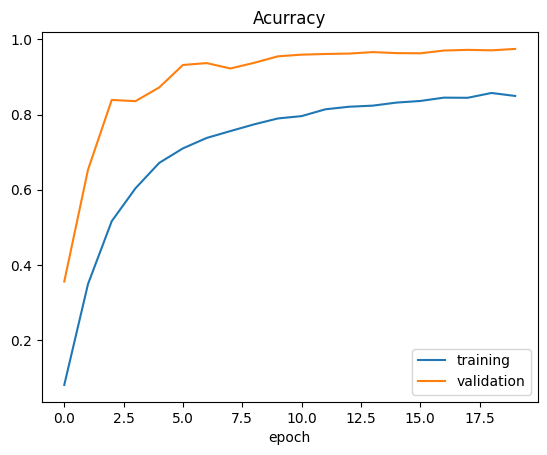

Test Score: 0.08933555334806442
Test Accuracy: 0.9728448390960693


In [43]:
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

# STORE THE MODEL AS A PICKLE OBJECT
pickle_out = open("model_colab.p", "wb")  # wb = WRITE BYTE
pickle.dump(model, pickle_out)
pickle_out.close()
# cv2.waitKey(0)

## Testing trained model

In [ ]:
import numpy as np
import cv2
import pickle
from PIL import ImageGrab

In [ ]:
#############################################

frameWidth = 640  # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.75  # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX

##############################################

In [ ]:

# SETUP THE VIDEO CAMERA
# cap = cv2.VideoCapture(0)
# cap.set(3, frameWidth)
# cap.set(4, frameHeight)
# cap.set(10, brightness)

# IMPORT THE TRANNIED MODEL

# with open("model.pkl", 'rb') as f:
#     model = pickle.load(f)

pickle_in = open("model_colab.p", "rb")  ## rb = READ BYTE
model = pickle.load(pickle_in)

In [ ]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img


def getCalssName(classNo):
    if classNo == 0:
        return 'Speed Limit 20 km/h'
    elif classNo == 1:
        return 'Speed Limit 30 km/h'
    elif classNo == 2:
        return 'Speed Limit 50 km/h'
    elif classNo == 3:
        return 'Speed Limit 60 km/h'
    elif classNo == 4:
        return 'Speed Limit 70 km/h'
    elif classNo == 5:
        return 'Speed Limit 80 km/h'
    elif classNo == 6:
        return 'End of Speed Limit 80 km/h'
    elif classNo == 7:
        return 'Speed Limit 100 km/h'
    elif classNo == 8:
        return 'Speed Limit 120 km/h'
    elif classNo == 9:
        return 'No passing'
    elif classNo == 10:
        return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11:
        return 'Right-of-way at the next intersection'
    elif classNo == 12:
        return 'Priority road'
    elif classNo == 13:
        return 'Yield'
    elif classNo == 14:
        return 'Stop'
    elif classNo == 15:
        return 'No vechiles'
    elif classNo == 16:
        return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17:
        return 'No entry'
    elif classNo == 18:
        return 'General caution'
    elif classNo == 19:
        return 'Dangerous curve to the left'
    elif classNo == 20:
        return 'Dangerous curve to the right'
    elif classNo == 21:
        return 'Double curve'
    elif classNo == 22:
        return 'Bumpy road'
    elif classNo == 23:
        return 'Slippery road'
    elif classNo == 24:
        return 'Road narrows on the right'
    elif classNo == 25:
        return 'Road work'
    elif classNo == 26:
        return 'Traffic signals'
    elif classNo == 27:
        return 'Pedestrians'
    elif classNo == 28:
        return 'Children crossing'
    elif classNo == 29:
        return 'Bicycles crossing'
    elif classNo == 30:
        return 'Beware of ice/snow'
    elif classNo == 31:
        return 'Wild animals crossing'
    elif classNo == 32:
        return 'End of all speed and passing limits'
    elif classNo == 33:
        return 'Turn right ahead'
    elif classNo == 34:
        return 'Turn left ahead'
    elif classNo == 35:
        return 'Ahead only'
    elif classNo == 36:
        return 'Go straight or right'
    elif classNo == 37:
        return 'Go straight or left'
    elif classNo == 38:
        return 'Keep right'
    elif classNo == 39:
        return 'Keep left'
    elif classNo == 40:
        return 'Roundabout mandatory'
    elif classNo == 41:
        return 'End of no passing'
    elif classNo == 42:
        return 'End of no passing by vechiles over 3.5 metric tons'

def captureScreen(bbox=(0,0,960,1080)):
    capScr = np.array(ImageGrab.grab(bbox))
    capScr = cv2.cvtColor(capScr, cv2.COLOR_RGB2BGR)
    return capScr

In [ ]:
import os

lst = os.listdir("/content/myData")
for classes in lst:
  images = os.listdir(f"/content/myData/{classes}")
  print(len(images))

540
690
1080
360
330
1080
270
240
1260
1350
450
540
1920
180
1650
1290
1800
360
270
300
300
330
210
1320
1170
1770
210
180
210
1890
690
990
1860
599
1260
390
2010
480
240
210
1980
180
360


In [ ]:
images

In [ ]:
sum =  0
for idx, img in enumerate(X_test):
      # PROCESS IMAGE
      img = cv2.resize(img, (32, 32))
      img = img.reshape(1, 32, 32, 1)
      predictions = model.predict(img)
      classes_x = np.argmax(predictions, axis=1)
      probabilityValue = np.amax(predictions)
      if probabilityValue > 0.5:
          # print(classes_x[0], np.where(y_test[idx] == 1))
          if classes_x[0] == np.where(y_test[idx] == 1):
            sum += 1

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 18s 18s/step


In [ ]:
sum/len(y_test)

NameError: ignored

In [ ]:
# img = cv2.imread("/content/myData/10/10_17130_1577672005.5357928.png")
lst = os.listdir("/content/myData")
acu = []
for classes in lst:
    sum = 0
    images = os.listdir(f"/content/myData/{classes}")
    total = len(images)
    for idx, img_file in enumerate(images):
      img = cv2.imread(f"/content/myData/{classes}/{img_file}")
      # READ IMAGE
      imgOrignal = img

      # PROCESS IMAGE
      img = np.asarray(imgOrignal)
      img = cv2.resize(img, (32, 32))
      img = preprocessing(img)
      # cv2.imshow("Processed Image", img)
      img = img.reshape(1, 32, 32, 1)
      # cv2.putText(imgOrignal, "CLASS: ", (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
      # cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
      # PREDICT IMAGE
      predictions = model.predict(img)
      # classIndex = model.predict_classes(img)
      classes_x = np.argmax(predictions, axis=1)
      probabilityValue = np.amax(predictions)
      if probabilityValue > 0.5:
          # print(getCalssName(classIndex))
          # cv2.putText(imgOrignal, str(classIndex) + " " + str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
          # cv2.putText(imgOrignal, str(round(probabilityValue * 100, 2)) + "%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
          # cv2.imshow("Result", imgOrignal)
          # print("predicted",classes_x, getCalssName(classes_x), round(probabilityValue * 100, 2), sum, idx)
          # print(classes, idx)
          if classes_x[0] == int(classes):
            sum += 1
    accuracy = (sum/total)
    acu.append(accuracy)
    print("Accuracy", accuracy,"--"*90)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step
Accuracy 0.9903703703703703 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 29ms/step
Accuracy 0.9911111111111112 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 23ms/step
Accuracy 0.9277777777777778 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 42ms/step
Accuracy 0.9984375 -----------------------------------------------------------------------------------------------

KeyboardInterrupt: ignored